Accuracy: 92.42%


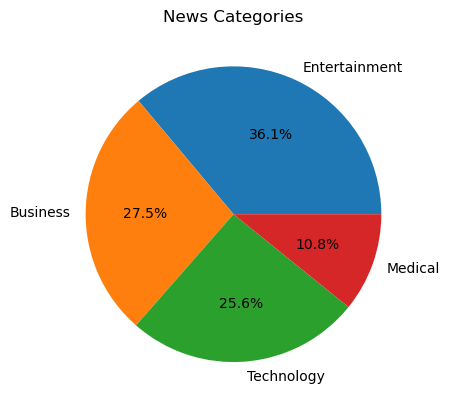

Enter your news article: hospitals in India
Predicted category:  Medical


In [5]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the dataset
df=pd.read_csv("C://Users//Asus//Desktop//Text Classification//News_Dataset.csv")

# Preprocess the data
df = df.dropna() # remove missing values
df = df.drop(["ID","URL","PUBLISHER","HOSTNAME","TIMESTAMP"], axis=1) # remove unnecessary columns
df["CATEGORY"] = df["CATEGORY"].replace({"b": "Business", "e": "Entertainment","t": "Technology","m": "Medical"})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["TITLE"], df["CATEGORY"], test_size=0.2, random_state=62)

# Extract features from the text data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Test the model
y_pred = clf.predict(X_test)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc*100))

# Count the number of articles in each category
category_counts = df["CATEGORY"].value_counts()

# Calculate the percentage of articles in each category
category_percentages = category_counts / category_counts.sum()

# Plot the pie chart
plt.pie(category_percentages, labels=category_percentages.index, autopct='%1.1f%%')
plt.title("News Categories")
plt.show()
# Input new news article
new_news = input("Enter your news article: ")

# Extract features from the new news article
new_news = vectorizer.transform([new_news])

# Predict the category of the new news article
pred_category = clf.predict(new_news)
print("Predicted category: ", pred_category[0])
